### 1. Загрузка данных и подготовка к анализу

In [1]:
# Библиотеки
#библиотеки
import pandas as pd
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')


In [3]:
visits.info()
display(visits.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [4]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')
visits.info()
display(visits.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [5]:
orders.info()
display(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [6]:
orders.columns = ['buy_ts', 'revenue', 'uid']
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format = '%Y-%m-%d %H:%M:%S')
orders.info()
display(orders.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [7]:
costs.info()
display(costs.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [8]:
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')
costs.info()
display(costs.tail(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
2532,10,2018-05-22,21.70
2533,10,2018-05-23,7.42
2534,10,2018-05-24,10.79
2535,10,2018-05-25,22.21
2536,10,2018-05-26,7.89
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


##### Выводы

В датасете visits данные о времени нахождения пользователей(`Start Ts`, `End Ts`) на сайте в формате object, переведем в datetime для дальнейшей работы. Приведем в порядок и имена столбцов.
В датасете orders данные о времени покупки `Buy Ts` в формате object, переведем в datetime для дальнейшей работы. Приведем в порядок и имена столбцов.
В датасете costs данные о времени покупки `dt` в формате object, переведем в datetime для дальнейшей работы.




### 2. Рассчет метрик и построение графиков

#### 2.1. Продуктовые метрики

In [9]:
# Добываем отдельные элементы даты
visits['start_ts_year'] = visits['start_ts'].astype('datetime64[Y]')
visits['start_ts_month'] = visits['start_ts'].astype('datetime64[M]')
visits['start_ts_week'] = visits['start_ts'].astype('datetime64[W]')
visits['start_ts_date'] = visits['start_ts'].astype('datetime64[D]')

##### 2.1.1. Сколько людей пользуются сайтом в день, неделю, месяц?

In [10]:
# Среднее количество уникальных пользователей в день
dau = visits.groupby('start_ts_date').agg({'uid': 'nunique'}).mean()

# Среднее количество уникальных пользователей в неделю
wau = visits.groupby(['start_ts_year',
                      'start_ts_week']).agg({'uid': 'nunique'}).mean()

# Среднее количество уникальных пользователей в месяц
mau = visits.groupby(['start_ts_year',
                      'start_ts_month']).agg({'uid': 'nunique'}).mean()

print('Среднее количество уникальных пользователей в день', int(dau))
print('Среднее количество пользователей в неделю', int(wau))
print('Среднее количество пользователей в месяц', int(mau))

Среднее количество уникальных пользователей в день 907
Среднее количество пользователей в неделю 5621
Среднее количество пользователей в месяц 23228


##### 2.1.2. Cколько раз за день пользователи в среднем заходят на сайт?

In [11]:
day_visits = visits.groupby('uid').agg({'start_ts_date': 'nunique'}).mean()
print('Среднее количество посещений сайта', round(day_visits, 1))

Среднее количество посещений сайта start_ts_date    1.4
dtype: float64


##### 2.1.3. Продолжительность типичной пользовательской сессии за весь период, график распределения

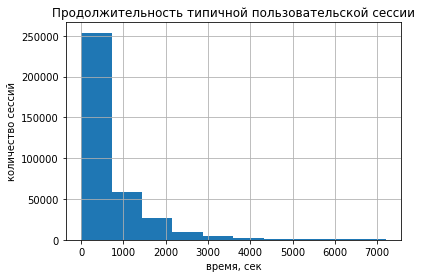

In [12]:
session_time = (visits['end_ts']- visits['start_ts']).dt.seconds
#session_time = round(session_time/60, 1)

session_time.hist(range = (0,7200))

plt.xlabel('время, сек') 
plt.ylabel('количество сессий') 
  
plt.title('Продолжительность типичной пользовательской сессии') 
plt.show() 

In [13]:
print('Средняя продолжительность типичной пользовательской сессии в секундах', session_time.mode())


Средняя продолжительность типичной пользовательской сессии в секундах 0    60
dtype: int64


##### 2.1.4. Рассчет Retention Rate, применяя когортный анализ. Найдите средний Retention Rate на второй месяц «жизни» когорт.

In [14]:
#Первое посещение сайта
first_visit = visits.groupby(['uid'])['start_ts_date'].min().reset_index()
first_visit['first_visit_month'] = first_visit['start_ts_date'].astype('datetime64[M]')
first_visit.columns = ['uid','first_visit_date', 'first_visit_month']
display(first_visit.tail())

,uid,first_visit_date,first_visit_month
228164,18446403737806311543,2017-11-30,2017-11-01
228165,18446424184725333426,2017-12-06,2017-12-01
228166,18446556406699109058,2018-01-01,2018-01-01
228167,18446621818809592527,2017-12-27,2017-12-01
228168,18446676030785672386,2017-10-04,2017-10-01


In [15]:
visits = visits.merge(first_visit, on = 'uid')
display(visits.head()) 

,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date,first_visit_date,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,2018-03-09,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,2018-03-09,2018-03-01


In [16]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

#Рассчет lifetime пользователя в рамках когорты
visits['month_cohort_lifetime'] = visits['start_ts_month'] - visits['first_visit_month']
visits['month_cohort_lifetime'] = visits['month_cohort_lifetime'] / np.timedelta64(1,'M')
visits['month_cohort_lifetime'] = round(visits['month_cohort_lifetime']).astype('int')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,start_ts_year,start_ts_month,start_ts_week,start_ts_date,first_visit_date,first_visit_month,month_cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,2018-03-09,2018-03-01,0


In [17]:
#Сгруппируем данные по когорте и lifetime
cohort_grouped = visits.groupby(['first_visit_month', 'month_cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

#Исходное количество пользователей в когорте
initial_users_count = cohort_grouped[cohort_grouped['month_cohort_lifetime']==0][['first_visit_month', 'uid']]
display(initial_users_count) 

,first_visit_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


In [18]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 

#Объединим данные по когортам с исходным количеством пользователей в когорте
cohort_grouped = cohort_grouped.merge(initial_users_count, on='first_visit_month') 
display(cohort_grouped.head(10))

,first_visit_month,month_cohort_lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259
5,2017-06-01,5,947,13259
6,2017-06-01,6,809,13259
7,2017-06-01,7,766,13259
8,2017-06-01,8,694,13259
9,2017-06-01,9,674,13259


In [19]:
# Рассчет Retention Rate
cohort_grouped['retention'] = cohort_grouped['uid']/cohort_grouped['cohort_users'] 
retention_pivot = cohort_grouped.pivot_table(index='first_visit_month', 
                                             columns='month_cohort_lifetime',
                                             values='retention',aggfunc='mean') 

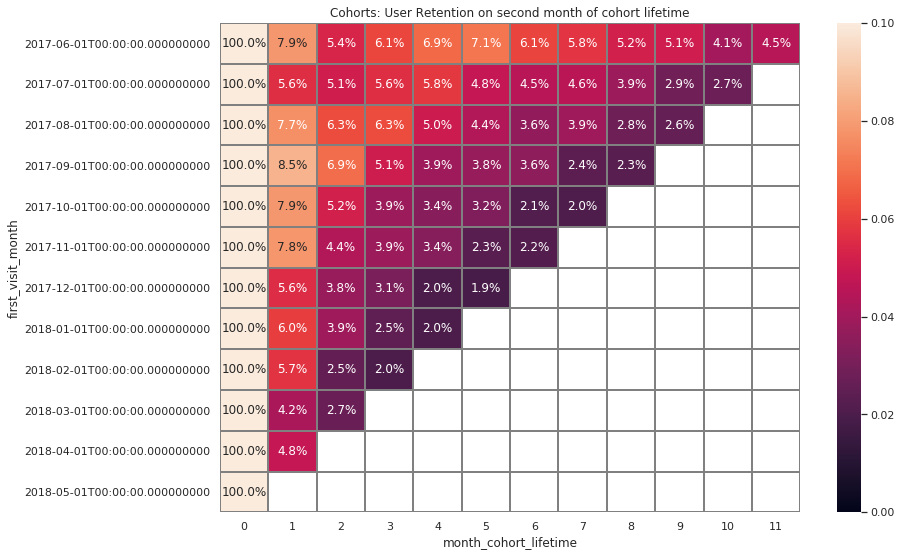

In [20]:
# Тепловая карта
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention on second month of cohort lifetime')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmin=0, vmax = 0.1 ); 

##### Выводы

- у всех когорт тенденция к снижению количества возвращения клиентов
- большой процент "невозвратных" клиентов наблюдается уже в первый месяц, показатели колеблятся в пределах 7,9-4,2%. Это значит, что отток клиентов в первый же месяц составляет 92,1-95,8%
- относительно удачной из всех можно считать когорту 2017-06
- самой неудачной из всех 12 когорт оказалась 2017-12, на конец периода жизни всего 1,9% возвращений клиентов


In [21]:
#Средний Retention Rate на второй месяц «жизни» когорт

retention_pivot_2 = retention_pivot.reset_index()
retention_pivot_2 = retention_pivot_2[2].mean()
print("Средний Retention Rate на второй месяц «жизни» когорт {:0.2%}".format(retention_pivot_2))

Средний Retention Rate на второй месяц «жизни» когорт 4.63%


##### Выводы

- Среднее количество уникальных пользователей в день 907 человек, среднее количество пользователей в неделю 5621 человек,
среднее количество пользователей в месяц  составляет 23228 человек
- Среднее количество посещений сайта 1 раз в день
- Продолжительность типичной пользовательской сессии составляет окло 10 минут
- Средний Retention Rate на второй месяц «жизни» когорт 4.63%

#### 2.2. Метрики электронной коммерции

##### 2.2.1. Cколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

In [22]:
orders['order_date'] = orders['buy_ts'].astype('datetime64[D]')

# Дата первой покупки
first_purchases_date = orders.groupby('uid').agg({'order_date' : 'min'}).reset_index()
first_purchases_date.columns = ['uid', 'first_order_date']
first_purchases_date['first_order_month'] = first_purchases_date['first_order_date'].astype('datetime64[M]')
# Добавляем дату первой активности на сайте
first_purchases_date = first_purchases_date.merge(first_visit, on = 'uid')

# Вычисляем время от первого посещения до первой покупки(дни)

first_purchases_date['days_first_purchases'] = ((first_purchases_date['first_order_date'] - \
first_purchases_date['first_visit_date'])/np.timedelta64(1,'D')).round().astype('int')
display(first_purchases_date.head())



,uid,first_order_date,first_order_month,first_visit_date,first_visit_month,days_first_purchases
0,313578113262317,2018-01-03,2018-01-01,2017-09-18,2017-09-01,107
1,1575281904278712,2017-06-03,2017-06-01,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11,2017-10-01,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-28,2018-01-01,2018-01-27,2018-01-01,1
4,2551852515556206,2017-11-24,2017-11-01,2017-11-24,2017-11-01,0


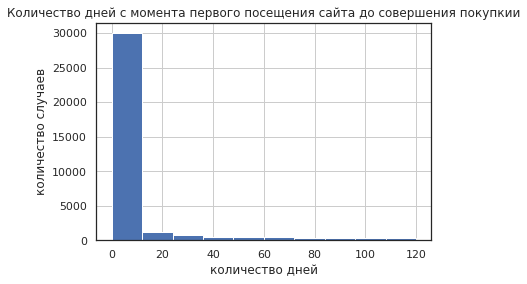

In [23]:
first_purchases_date['days_first_purchases'].hist(range = (0, 120), bins = 10)

plt.xlabel('количество дней') 
plt.ylabel('количество случаев') 
  
plt.title('Количество дней с момента первого посещения сайта до совершения покупкии') 
plt.show() 

In [24]:
print('Cреднее количество дней с момента первого посещения сайта до совершения покупки составляет', first_purchases_date['days_first_purchases'].mode())


Cреднее количество дней с момента первого посещения сайта до совершения покупки составляет 0    0
dtype: int64


##### 2.2.2. Среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев

In [25]:
# Определяем размеры когорт
cogort_size = first_purchases_date.groupby('first_order_month').agg({'uid' : 'nunique'}).reset_index()
cogort_size.columns = ['first_order_month', 'n_byers']

display(cogort_size)


,first_order_month,n_byers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [26]:
# Формируем сводную таблицу
order_time_first_purchases = pd.merge(orders, first_purchases_date, on = 'uid')
order_time_first_purchases['order_month'] = order_time_first_purchases['order_date'].astype('datetime64[M]')
display(order_time_first_purchases.head())

,buy_ts,revenue,uid,order_date,first_order_date,first_order_month,first_visit_date,first_visit_month,days_first_purchases,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01


In [27]:
# группировка по когортам + считаем общую выручку и кол-во покупок
order_cogorts = order_time_first_purchases.groupby(['first_order_month', 
                                                    'order_month']).agg({'revenue' : 'sum', 'buy_ts' : 'count'}).reset_index()
order_cogorts = order_cogorts.merge(cogort_size, on = 'first_order_month')
order_cogorts.columns = ['first_order_month', 'order_month', 'total_revenue', 'total_purchases', 'n_byers']

# определяем возраст когорты
order_cogorts['age'] = ((order_cogorts['order_month'] - order_cogorts['first_order_month'])\
                        / np.timedelta64(1,'M')).round().astype('int')
order_cogorts['average_purchases'] = order_cogorts['total_purchases'] / order_cogorts['n_byers'] 
display(order_cogorts.head())

,first_order_month,order_month,total_revenue,total_purchases,n_byers,age,average_purchases
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618
1,2017-06-01,2017-07-01,981.82,177,2023,1,0.087494
2,2017-06-01,2017-08-01,885.34,174,2023,2,0.086011
3,2017-06-01,2017-09-01,1931.30,226,2023,3,0.111715
4,2017-06-01,2017-10-01,2068.58,292,2023,4,0.144340


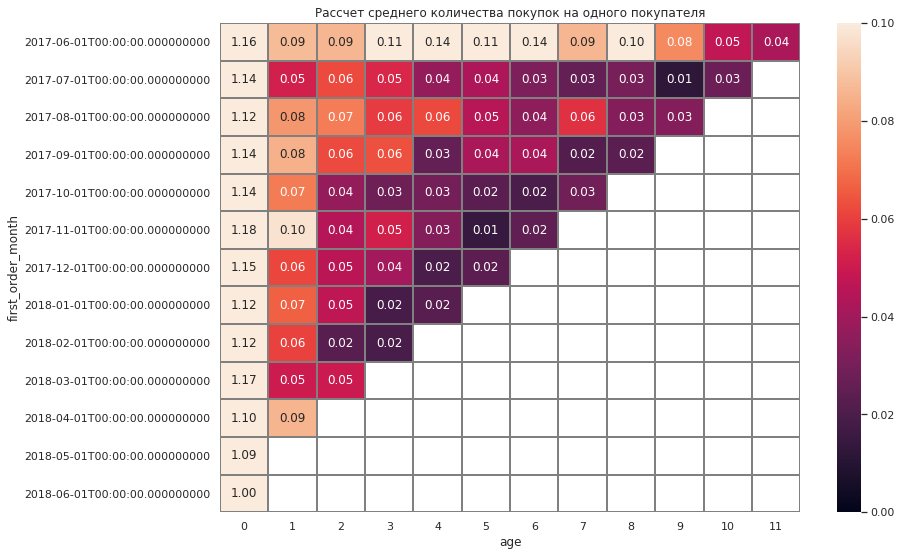

In [28]:
# Рассчет cреднего количества покупок на одного покупателя

purchases_number = order_cogorts.pivot_table(index='first_order_month', 
                                             columns='age',
                                             values='average_purchases',aggfunc='mean')
purchases_number.fillna('')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Рассчет cреднего количества покупок на одного покупателя')
sns.heatmap(purchases_number, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmin=0, vmax = 0.1 )

##### Выводы

- каждая когорта в начале своего пути на 1 клиента делала более 1 покупки
- на второй месяц показатели в среднем падают на 93%
- относительно удачной когортой можно считать 2017-06,  на конец жизни этой когорты покупатели в среднем делали 3,4% от первоначального количества покупок на одного клиента
- также можно отметить успешность когорты 2018-05, однако срок жизни слишком мал для полноценного анализа и понимания ее поведения
- когорта 2017-07 отличается достаточно низким процентом покупок к концу жизни когорты, всего 2,6% от первоначального количества

In [29]:
# Рассчет cреднего количества покупок на одного покупателя для 6 месяца
print('Cреднеее количества покупок на одного покупателя для 6 месяца', round(purchases_number[5].mean(),2))


Cреднеее количества покупок на одного покупателя для 6 месяца 0.04


##### 2.2.3. Средний чек

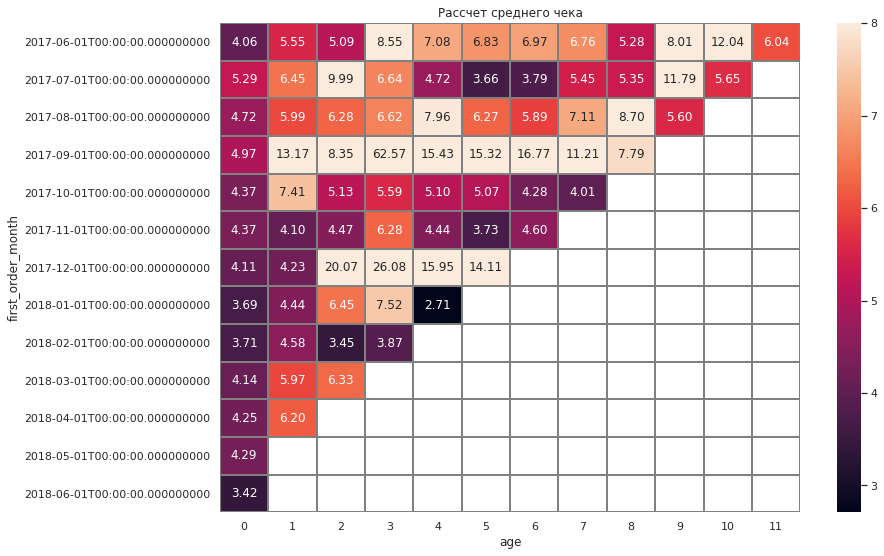

In [30]:
order_cogorts['average_reciept'] = round(order_cogorts['total_revenue'] / order_cogorts['total_purchases'], 2)

reciept = order_cogorts.pivot_table(index='first_order_month', 
                                             columns='age',
                                             values='average_reciept',aggfunc='mean')
purchases_number.fillna('')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Рассчет cреднего чека')
sns.heatmap(reciept, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=8)

##### Выводы

- у каждой когорты в начале своего пути средний чек был около 4,3 у.е
- в большинстве случаев с возрастом когорты увеличивается средний чек, однако данная динамика весьма не однозначна. Одной из возможных причин резкого роста среднего чека является походящаяя акция для покупателей или ряд популярных мероприятий(например открытие продаж билетов на чемпионат мира по футболу 2018) 
- особенно отличаяется когорта 2017-09. На второй месяц жизни когорты средний чек составил 265% от стартового месяца

In [31]:
# Рассчет cреднего чека для 7 месяца
print('Cредний чек для 7 месяца составляет', round(reciept[6].mean(),2))


Cредний чек для 7 месяца составляет 7.05


##### 2.2.4. Изменение во времени LTV на покупателя по когортам

In [32]:
margin_rate = 1
  
order_cogorts['gp'] = order_cogorts['total_revenue'] * margin_rate

order_cogorts['ltv'] = order_cogorts['gp'] / order_cogorts['n_byers']
display(order_cogorts. head(10))

,first_order_month,order_month,total_revenue,total_purchases,n_byers,age,average_purchases,average_reciept,gp,ltv
0,2017-06-01,2017-06-01,9557.49,2354,2023,0,1.163618,4.06,9557.49,4.724414
1,2017-06-01,2017-07-01,981.82,177,2023,1,0.087494,5.55,981.82,0.485329
2,2017-06-01,2017-08-01,885.34,174,2023,2,0.086011,5.09,885.34,0.437637
3,2017-06-01,2017-09-01,1931.30,226,2023,3,0.111715,8.55,1931.30,0.954671
4,2017-06-01,2017-10-01,2068.58,292,2023,4,0.144340,7.08,2068.58,1.022531
5,2017-06-01,2017-11-01,1487.92,218,2023,5,0.107761,6.83,1487.92,0.735502
6,2017-06-01,2017-12-01,1922.74,276,2023,6,0.136431,6.97,1922.74,0.950440
7,2017-06-01,2018-01-01,1176.56,174,2023,7,0.086011,6.76,1176.56,0.581592
8,2017-06-01,2018-02-01,1119.15,212,2023,8,0.104795,5.28,1119.15,0.553213
9,2017-06-01,2018-03-01,1225.51,153,2023,9,0.075630,8.01,1225.51,0.605788


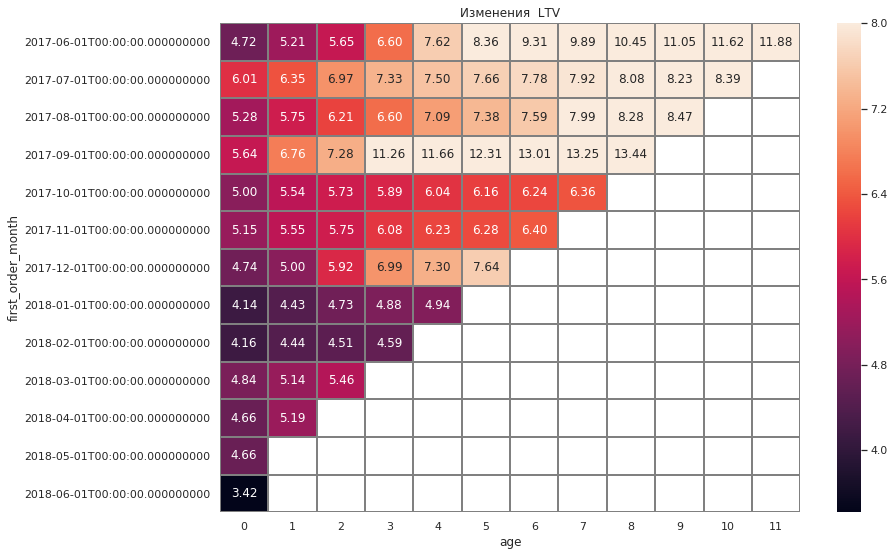

In [33]:
# сводная таблица по когортам и месяцам жизни
pivot_order_cogorts = order_cogorts.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='sum').cumsum(axis=1)
    
pivot_order_cogorts.fillna('') 
# Тепловая карта
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Изменения  LTV')
sns.heatmap(pivot_order_cogorts, annot=True, fmt='.2f', linewidths=1, linecolor='gray', vmax=8)

In [34]:
print('Средний LTV по когортам за 6 месяцев', pivot_order_cogorts[5].mean().round(2))

Средний LTV по когортам за 6 месяцев 7.97


##### Выводы

Метрики электронной комерции дали ответы на следующие вопросы: 
- Cреднее количество дней с момента первого посещения сайта до совершения покупки составляет 17
- Cреднеее количества покупок на одного покупателя для 6 месяца 0.04
- Cредний чек для 7 месяца составляет 7.05 у.е
- Средний LTV по когортам за 6 месяцев 7.97 у.е
- Наблюдается закономерность в соотношении количества покупок и среднего чека. Количество покупок с течением жизни когорт падает, а средний чек увеличивается
- Изучая тепловую карту LTV, выделяются перые 4 когорты. Уже к 6му месяцу жизни LTV увеличивается на 32-134% относительно первого месяца жизни

#### 2.3. Маркетинговые метрики

##### 2.3.1. Посчитайте общую сумму расходов на маркетинг. Выясните, как траты распределены по источникам;

In [35]:
# добываем список пользователь - источник
source_uid = visits.sort_values('start_ts').groupby('uid').first()
source_uid = source_uid['source_id']
display(source_uid) 

uid
11863502262781          3
49537067089222          2
297729379853735         3
313578113262317         2
325320750514679         5
                       ..
18446403737806311543    5
18446424184725333426    4
18446556406699109058    3
18446621818809592527    4
18446676030785672386    3
Name: source_id, Length: 228169, dtype: int64

In [36]:
# добавляем источники в сводную таблицу
order_time_first_purchases = pd.merge(order_time_first_purchases,source_uid, left_on='uid', right_index = True)
display(order_time_first_purchases.head()) 

,buy_ts,revenue,uid,order_date,first_order_date,first_order_month,first_visit_date,first_visit_month,days_first_purchases,order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2017-06-01,3


In [37]:
# группируем по источнику
expenses = order_time_first_purchases.groupby(['source_id', 'first_order_date']).agg({'uid': 'nunique'}).reset_index()
expenses.rename(columns = {'uid':'n_byers'}, inplace = True)
display(expenses) 

,source_id,first_order_date,n_byers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18
...,...,...,...
2430,10,2018-05-27,2
2431,10,2018-05-28,10
2432,10,2018-05-29,7
2433,10,2018-05-30,5


In [38]:
costs['n_cogort'] = costs['dt'].astype('datetime64[M]')

expenses = pd.merge(expenses,costs, left_on = ['source_id', 'first_order_date'],
                    right_on = ['source_id', 'dt'])
display(expenses)

,source_id,first_order_date,n_byers,dt,costs,n_cogort
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01
...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,2018-05-01
2429,10,2018-05-28,10,2018-05-28,21.26,2018-05-01
2430,10,2018-05-29,7,2018-05-29,11.32,2018-05-01
2431,10,2018-05-30,5,2018-05-30,33.15,2018-05-01


In [39]:
expenses['dt_month'] = expenses['dt'].astype('datetime64[M]')
display(expenses)

,source_id,first_order_date,n_byers,dt,costs,n_cogort,dt_month
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,2017-06-01
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,2017-06-01
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,2017-06-01
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,2017-06-01
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,2018-05-01,2018-05-01
2429,10,2018-05-28,10,2018-05-28,21.26,2018-05-01,2018-05-01
2430,10,2018-05-29,7,2018-05-29,11.32,2018-05-01,2018-05-01
2431,10,2018-05-30,5,2018-05-30,33.15,2018-05-01,2018-05-01


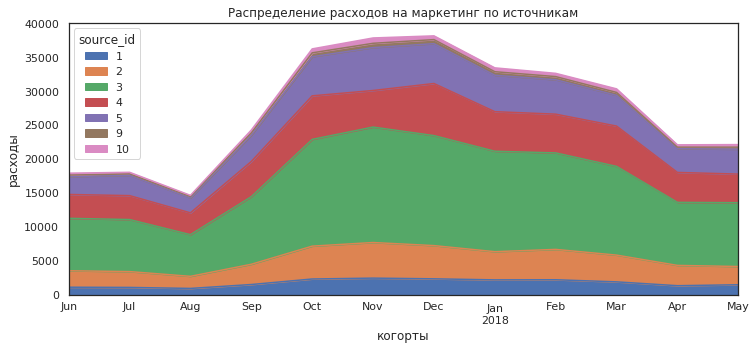

In [40]:

pivot_total_expenses = expenses.pivot_table(
        index='n_cogort', 
        columns='source_id', 
        values='costs', 
        aggfunc='sum')
ax = pivot_total_expenses.plot.area(figsize = (12, 5), 
                             title = 'Распределение расходов на маркетинг по источникам')
plt.xlabel('когорты') 
plt.ylabel('расходы')  
plt.show() 


##### Выводы

- самым затратным оказался 3й источник привлечения клиентов
- самыми бюджетными 9й и 10й источники привлечения

##### 2.3.2. Рассчитайте средний CAC на одного покупателя для всего проекта и для каждого источника трафика;

In [41]:

expenses['CAC'] = round(expenses['costs'] / expenses['n_byers'],2)

display(expenses) 

,source_id,first_order_date,n_byers,dt,costs,n_cogort,dt_month,CAC
0,1,2017-06-01,14,2017-06-01,75.20,2017-06-01,2017-06-01,5.37
1,1,2017-06-02,7,2017-06-02,62.25,2017-06-01,2017-06-01,8.89
2,1,2017-06-03,7,2017-06-03,36.53,2017-06-01,2017-06-01,5.22
3,1,2017-06-04,3,2017-06-04,55.00,2017-06-01,2017-06-01,18.33
4,1,2017-06-05,18,2017-06-05,57.08,2017-06-01,2017-06-01,3.17
...,...,...,...,...,...,...,...,...
2428,10,2018-05-27,2,2018-05-27,9.92,2018-05-01,2018-05-01,4.96
2429,10,2018-05-28,10,2018-05-28,21.26,2018-05-01,2018-05-01,2.13
2430,10,2018-05-29,7,2018-05-29,11.32,2018-05-01,2018-05-01,1.62
2431,10,2018-05-30,5,2018-05-30,33.15,2018-05-01,2018-05-01,6.63


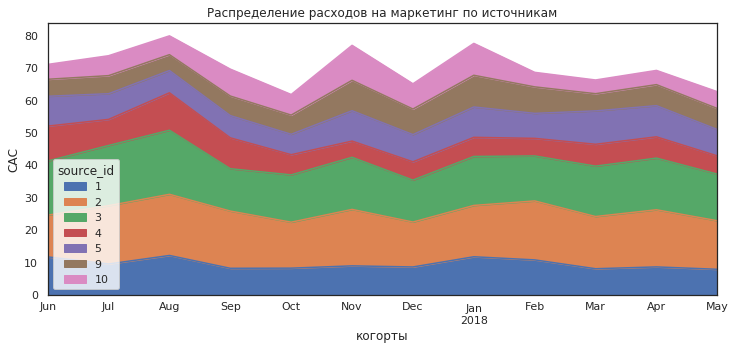

In [42]:
# сводная и график
pivot_expenses = expenses.pivot_table(
        index='n_cogort', 
        columns='source_id', 
        values='CAC', 
        aggfunc='mean')
ax = pivot_expenses.plot.area(figsize = (12, 5), 
                             title = 'Распределение расходов на маркетинг по источникам')
plt.xlabel('когорты') 
plt.ylabel('САС')   
plt.show()    


##### Выводы

- лидерами по стоимости привлечения клиента оказались 2 и 3 источники привлечения
- самые бюджетные 9й и 10й источники привлечения

##### 2.3.3. Расчет ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. 

In [43]:
ltv_table = order_time_first_purchases.groupby(['source_id','first_order_month', 
                                                    'order_month']).agg({'revenue' : 'sum', 'buy_ts' : 'count'}).reset_index()
ltv_table.columns = ['source_id', 'n_cogort', 'order_month', 'total_revenue', 'n_byers']
ltv_table['age'] = ((ltv_table['order_month'] - ltv_table['n_cogort'])/ np.timedelta64(1,'M')).round().astype('int')
ltv_table['LTV'] = round(ltv_table['total_revenue'] / ltv_table['n_byers'], 2)
display(ltv_table)

,source_id,n_cogort,order_month,total_revenue,n_byers,age,LTV
0,1,2017-06-01,2017-06-01,1378.70,268,0,5.14
1,1,2017-06-01,2017-07-01,414.98,80,1,5.19
2,1,2017-06-01,2017-08-01,419.43,87,2,4.82
3,1,2017-06-01,2017-09-01,714.24,119,3,6.00
4,1,2017-06-01,2017-10-01,811.20,114,4,7.12
...,...,...,...,...,...,...,...
511,10,2018-03-01,2018-03-01,638.44,218,0,2.93
512,10,2018-03-01,2018-04-01,12.71,5,1,2.54
513,10,2018-03-01,2018-05-01,6.29,3,2,2.10
514,10,2018-04-01,2018-04-01,261.93,112,0,2.34


In [44]:
CAC = expenses.groupby(['source_id','n_cogort'])['CAC'].mean().round(2)

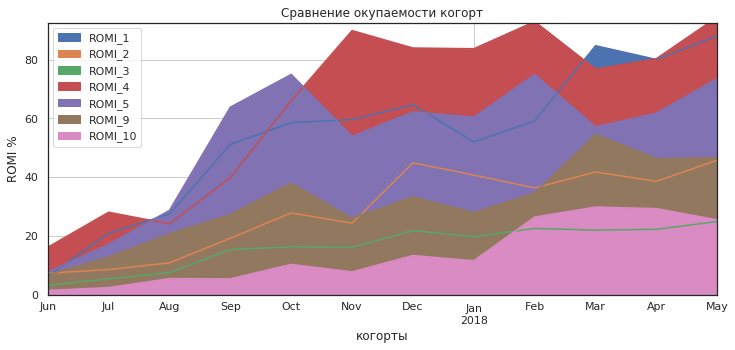

In [45]:
ltv_1 = ltv_table.query('source_id ==1').groupby(['source_id','n_cogort'])['LTV'].sum().cumsum()
ROMI_1 = pd.merge(ltv_1, CAC, on = ['source_id','n_cogort']).reset_index()
ROMI_1['ROMI'] = round(ROMI_1['LTV'] / ROMI_1['CAC'],2) 
ROMI_1.rename(columns={'ROMI': 'ROMI_1'}, inplace = True)
ax_1 = ROMI_1.pivot_table(index =['n_cogort'], values=['ROMI_1']).plot.area(grid=True, 
                                                                 figsize=(12, 5))

ltv_2 = ltv_table.query('source_id ==2').groupby(['source_id','n_cogort'])['LTV'].sum().cumsum()
ROMI_2 = pd.merge(ltv_2, CAC, on = ['source_id','n_cogort']).reset_index()
ROMI_2['ROMI'] = round(ROMI_2['LTV'] / ROMI_2['CAC'],2) 
ROMI_2.rename(columns={'ROMI': 'ROMI_2'}, inplace = True)
ax_2 = ROMI_2.pivot_table(index =['n_cogort'], values=['ROMI_2']).plot.area(grid=True, 
                                                                 figsize=(12, 5), ax=ax_1)

ltv_3 = ltv_table.query('source_id ==3').groupby(['source_id','n_cogort'])['LTV'].sum().cumsum()
ROMI_3 = pd.merge(ltv_3, CAC, on = ['source_id','n_cogort']).reset_index()
ROMI_3['ROMI'] = round(ROMI_3['LTV'] / ROMI_3['CAC'],2) 
ROMI_3.rename(columns={'ROMI': 'ROMI_3'}, inplace = True)
ax_3 = ROMI_3.pivot_table(index =['n_cogort'], values=['ROMI_3']).plot.area(grid=True, 
                                                                 figsize=(12, 5), ax=ax_2)

ltv_4 = ltv_table.query('source_id ==4').groupby(['source_id','n_cogort'])['LTV'].sum().cumsum()
ROMI_4 = pd.merge(ltv_4, CAC, on = ['source_id','n_cogort']).reset_index()
ROMI_4['ROMI'] = round(ROMI_4['LTV'] / ROMI_4['CAC'],2) 
ROMI_4.rename(columns={'ROMI': 'ROMI_4'}, inplace = True)
ax_4 = ROMI_4.pivot_table(index =['n_cogort'], values=['ROMI_4']).plot.area(grid=True, 
                                                                 figsize=(12, 5), ax=ax_3)

ltv_5 = ltv_table.query('source_id ==5').groupby(['source_id','n_cogort'])['LTV'].sum().cumsum()
ROMI_5 = pd.merge(ltv_5, CAC, on = ['source_id','n_cogort']).reset_index()
ROMI_5['ROMI'] = round(ROMI_5['LTV'] / ROMI_5['CAC'],2) 
ROMI_5.rename(columns={'ROMI': 'ROMI_5'}, inplace = True)
ax_5 = ROMI_5.pivot_table(index =['n_cogort'], values=['ROMI_5']).plot.area(grid=True, 
                                                                 figsize=(12, 5), ax=ax_4)

ltv_9 = ltv_table.query('source_id ==9').groupby(['source_id','n_cogort'])['LTV'].sum().cumsum()
ROMI_9 = pd.merge(ltv_9, CAC, on = ['source_id','n_cogort']).reset_index()
ROMI_9['ROMI'] = round(ROMI_9['LTV'] / ROMI_9['CAC'],2) 
ROMI_9.rename(columns={'ROMI': 'ROMI_9'}, inplace = True)
ax_9 = ROMI_9.pivot_table(index=['n_cogort'], values=['ROMI_9']).plot.area(grid=True, 
                                                                 figsize=(12, 5), ax=ax_5)

ltv_10 = ltv_table.query('source_id ==10').groupby(['source_id','n_cogort'])['LTV'].sum().cumsum()
ROMI_10 = pd.merge(ltv_10, CAC, on = ['source_id','n_cogort']).reset_index()
ROMI_10['ROMI'] = round(ROMI_10['LTV'] / ROMI_10['CAC'],2) 
ROMI_10.rename(columns={'ROMI': 'ROMI_10'}, inplace = True)
ROMI_10.pivot_table(index=['n_cogort'], values=['ROMI_10']).plot.area(grid=True, 
                                                                 figsize=(12, 5), 
                                                                      ax=ax_9, title = 'Сравнение окупаемости когорт' )



plt.xlabel('когорты') 
plt.ylabel('ROMI %')  
plt.show() 

##### Выводы

Для изучения маркетинговых метрик применены графики.
Лидером по расходам на маркетинг оказался источник превлечения под номером 3, самые низкие показатели расхода у 9 и 10 источников.
В рассчете средней стоимости привелчения покупателя(CAC) выше всего оказались у 2 и 3 источники.
График показателей качества вложения маркетинговых инвестиций(ROMI) говорит о том, что выгоднее всего оказался вклад в 4 источник привлечения, а хуже всего справился с задачей 10 источник превлечения.

### 3. Выводы и рекомендации

#### 3.1. Источники трафика, на которые маркетологам стоит делать упор. 
На мой взгляд стоит обратить внимание на 4 и 5 источники привлечения. Именно они справились лучше всего по результатам качества вложения маркетинговых инвестиций(ROMI). Стоит также отметить, что эти источники дают среднюю стоимость клиента по графику CAC и расходы на маркетинг.

#### 3.2. Опишите выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;
Изучив продуктовые метрики, можно сделать следующие выводы:
- Среднее количество уникальных пользователей в день 907 человек, среднее количество пользователей в неделю 5621 человек,
среднее количество пользователей в месяц  составляет 23228 человек
- Среднее количество посещений сайта 1 раз в день
- Продолжительность типичной пользовательской сессии составляет окло 10 минут
- Средний Retention Rate на второй месяц «жизни» когорт 4.63%

Метрики электронной комерции дали ответы на следующие вопросы:
- Cреднее количество дней с момента первого посещения сайта до совершения покупки составляет 17
- Cреднее количество покупок на одного покупателя для 6 месяца 0.04
- Cредний чек для 7 месяца составляет 7.05 у.е
- Средний LTV по когортам за 6 месяцев 7.97%

Маркетинговые метрики помогли разобраться с дальнейшим направлением работы по привлечению клиентов.
- Лидером по расходам на маркетинг оказался источник превлечения под номером 3, самые низкие показатели расхода у 9 источника.
- В рассчете средней стоимости привелчения покупателя(CAC) выше всего оказался у 2 источника, с небольшим отрывом идет 3 тип.
- График показателей качества вложения маркетинговых инвестиций(ROMI) говорит о том, что выгоднее всего оказался вклад в 10 источник привлечения, а хуже всего справился с задачей 1 источник превлечения.

#### 3.3. Подведите итоги когортного анализа. Определите самые перспективные для компании когорты клиентов
В исследовании клиентов разбивали на 13 когорт и смотрели за их поведением по различным показателям. С точки зрения показателей LTV самыми перспективными оказались 3 когорты: 2017-09, 2017-06 и 2017-12. Эти когорты на ранних "этапах жизни" начинали давать больше всего покупок и выручки.